# Machine Learning Project From Start to End

## Get the Data


### Download the Data


In [2]:
from sklearn import datasets
import pandas as pd
from seaborn import load_dataset


titanic = load_dataset('titanic')


#### Modify Data for Practice

In [ ]:
titanic = titanic.drop("pclass", axis = 1)
titanic = titanic.drop("alive", axis = 1)
titanic = titanic.drop("embarked", axis = 1)
titanic = titanic.drop("who", axis = 1)
titanic = titanic.drop("alone", axis = 1)

### Take a Quick Look at the Data Structure

**- DataFrame.[head()](https://https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) : Return the first n rows.**

This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.

In [ ]:
titanic.head()

,survived,sex,age,sibsp,parch,fare,class,adult_male,deck,embark_town
0,0,male,22.0,1,0,7.2500,Third,True,NaN,Southampton
1,1,female,38.0,1,0,71.2833,First,False,C,Cherbourg
2,1,female,26.0,0,0,7.9250,Third,False,NaN,Southampton
3,1,female,35.0,1,0,53.1000,First,False,C,Southampton
4,0,male,35.0,0,0,8.0500,Third,True,NaN,Southampton


In [ ]:
titanic.head(10)

,survived,sex,age,sibsp,parch,fare,class,adult_male,deck,embark_town
0,0,male,22.0,1,0,7.2500,Third,True,NaN,Southampton
1,1,female,38.0,1,0,71.2833,First,False,C,Cherbourg
2,1,female,26.0,0,0,7.9250,Third,False,NaN,Southampton
3,1,female,35.0,1,0,53.1000,First,False,C,Southampton
4,0,male,35.0,0,0,8.0500,Third,True,NaN,Southampton
5,0,male,NaN,0,0,8.4583,Third,True,NaN,Queenstown
6,0,male,54.0,0,0,51.8625,First,True,E,Southampton
7,0,male,2.0,3,1,21.0750,Third,False,NaN,Southampton
8,1,female,27.0,0,2,11.1333,Third,False,NaN,Southampton
9,1,female,14.0,1,0,30.0708,Second,False,NaN,Cherbourg


**- DataFrame.[info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) : Print a concise summary of a DataFrame.**

This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   sex          891 non-null    object  
 2   age          714 non-null    float64 
 3   sibsp        891 non-null    int64   
 4   parch        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   class        891 non-null    category
 7   adult_male   891 non-null    bool    
 8   deck         203 non-null    category
 9   embark_town  889 non-null    object  
dtypes: bool(1), category(2), float64(2), int64(3), object(2)
memory usage: 51.9+ KB


**- DataFrame.[describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html):Generate descriptive statistics.**

Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [ ]:
titanic.describe()

,survived,age,sibsp,parch,fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.describe(include='all')

,survived,sex,age,sibsp,parch,fare,class,adult_male,deck,embark_town
count,891.000000,891,714.000000,891.000000,891.000000,891.000000,891,891,203,889
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,7,3
top,NaN,male,NaN,NaN,NaN,NaN,Third,True,C,Southampton
freq,NaN,577,NaN,NaN,NaN,NaN,491,537,59,644
mean,0.383838,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN
std,0.486592,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN
min,0.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,0.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN
50%,0.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN
75%,1.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN


In [ ]:
titanic.describe(include ='object')

,sex,embark_town
count,891,889
unique,2,3
top,male,Southampton
freq,577,644


**- DataFrame.[value_counts(subset, normalize, sort, ascending, dropna)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html) : Return a Series containing counts of unique rows in the DataFrame.**

In [ ]:
titanic.value_counts()

survived  sex     age   sibsp  parch  fare      class  adult_male  deck  embark_town
1         female  24.0  0      0      69.3000   First  False       B     Cherbourg      2
0         female  2.0   0      1      10.4625   Third  False       G     Southampton    1
1         female  48.0  0      0      25.9292   First  False       D     Southampton    1
                  39.0  1      1      83.1583   First  False       E     Cherbourg      1
                                      110.8833  First  False       C     Cherbourg      1
                                                                                       ..
                  14.0  1      2      120.0000  First  False       B     Southampton    1
                  15.0  0      1      211.3375  First  False       B     Southampton    1
                  16.0  0      0      86.5000   First  False       B     Southampton    1
                               1      39.4000   First  False       D     Southampton    1
          male 

In [ ]:
titanic["deck"].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [ ]:
titanic.value_counts(subset='deck')

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
dtype: int64

In [ ]:
titanic["deck"].value_counts(sort = False)

A    15
B    47
C    59
D    33
E    32
F    13
G     4
Name: deck, dtype: int64

In [ ]:
titanic["deck"].value_counts(ascending=True)

G     4
F    13
A    15
E    32
D    33
B    47
C    59
Name: deck, dtype: int64

In [ ]:
titanic["deck"].value_counts(normalize=True)

C    0.290640
B    0.231527
D    0.162562
E    0.157635
A    0.073892
F    0.064039
G    0.019704
Name: deck, dtype: float64

**- Searching outlier by using histogram**




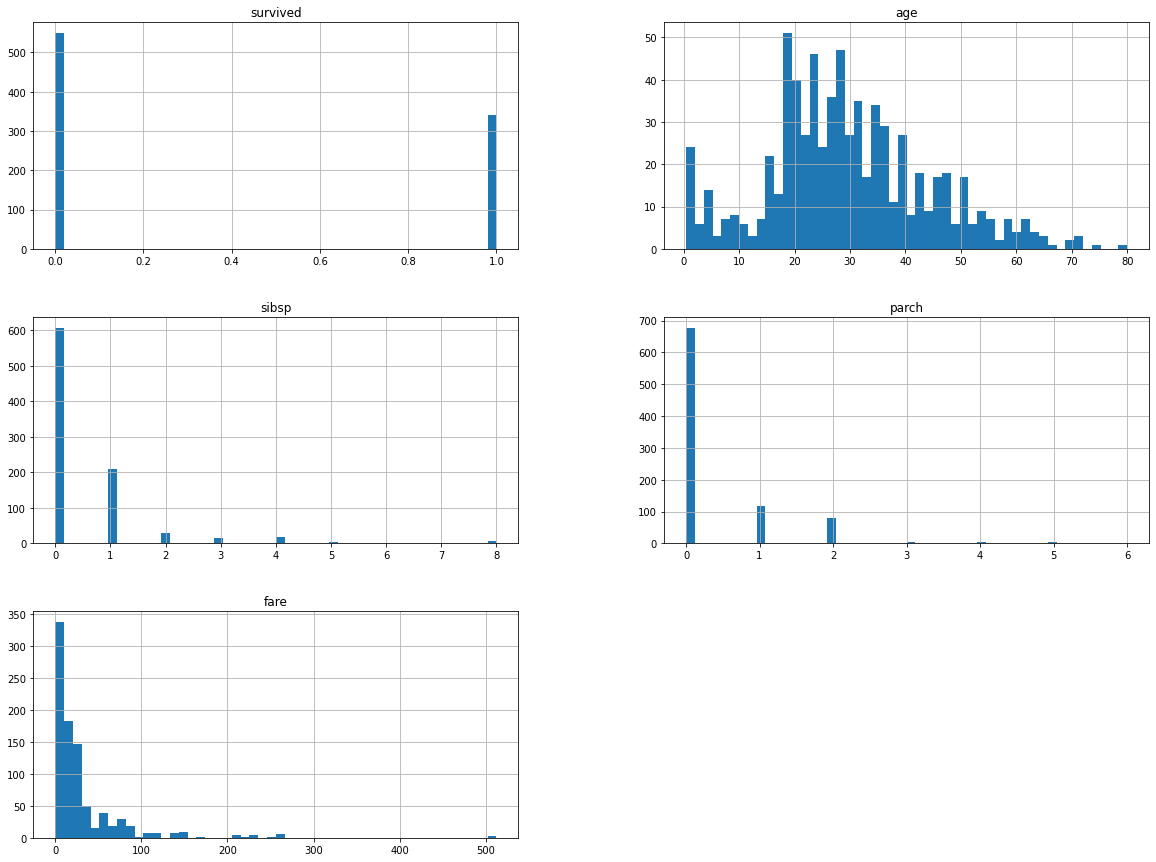

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
titanic.hist(bins=50, figsize = (20, 15))
plt.show()

### Create Test Set

**Split the Train/Test dataset using sklearn split**

In [3]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(titanic)

print(titanic.info())
print(train_set.info())
print(test_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 739 to 658


## Explore and visualize to gain insight from data

In [ ]:
corr_matrix = titanic.corr()
corr_matrix

,survived,age,sibsp,parch,fare,adult_male
survived,1.000000,-0.077221,-0.035322,0.081629,0.257307,-0.557080
age,-0.077221,1.000000,-0.308247,-0.189119,0.096067,0.280328
sibsp,-0.035322,-0.308247,1.000000,0.414838,0.159651,-0.253586
parch,0.081629,-0.189119,0.414838,1.000000,0.216225,-0.349943
fare,0.257307,0.096067,0.159651,0.216225,1.000000,-0.182024
adult_male,-0.557080,0.280328,-0.253586,-0.349943,-0.182024,1.000000


### Data Cleaning


In [ ]:
titanic_labels = train_set["survived"].copy() #by copying "alive", make label
train_set = train_set.drop("survived", axis = 1)

- Basic three methods deleting NULL data
    - option 1: delete that row -> dropna()
    - option 2: delete that column -> drop()
    - option 3: fill the value(0, mean, median, etc...) -> fillna()

In [ ]:
sample_incomplete_rows = titanic[titanic.isnull().any(axis=1)].head(10)
sample_incomplete_rows.info()
sample_incomplete_rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 14
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     10 non-null     int64   
 1   sex          10 non-null     object  
 2   age          9 non-null      float64 
 3   sibsp        10 non-null     int64   
 4   parch        10 non-null     int64   
 5   fare         10 non-null     float64 
 6   class        10 non-null     category
 7   adult_male   10 non-null     bool    
 8   deck         0 non-null      category
 9   embark_town  10 non-null     object  
dtypes: bool(1), category(2), float64(2), int64(3), object(2)
memory usage: 1.1+ KB


,survived,sex,age,sibsp,parch,fare,class,adult_male,deck,embark_town
0,0,male,22.0,1,0,7.2500,Third,True,NaN,Southampton
2,1,female,26.0,0,0,7.9250,Third,False,NaN,Southampton
4,0,male,35.0,0,0,8.0500,Third,True,NaN,Southampton
5,0,male,NaN,0,0,8.4583,Third,True,NaN,Queenstown
7,0,male,2.0,3,1,21.0750,Third,False,NaN,Southampton
8,1,female,27.0,0,2,11.1333,Third,False,NaN,Southampton
9,1,female,14.0,1,0,30.0708,Second,False,NaN,Cherbourg
12,0,male,20.0,0,0,8.0500,Third,True,NaN,Southampton
13,0,male,39.0,1,5,31.2750,Third,True,NaN,Southampton
14,0,female,14.0,0,0,7.8542,Third,False,NaN,Southampton


*  Option 1: Delete row

In [ ]:
sample_incomplete_rows.dropna(subset=["age"])    # option 1

,survived,sex,age,sibsp,parch,fare,class,adult_male,deck,embark_town
0,0,male,22.0,1,0,7.2500,Third,True,NaN,Southampton
2,1,female,26.0,0,0,7.9250,Third,False,NaN,Southampton
4,0,male,35.0,0,0,8.0500,Third,True,NaN,Southampton
7,0,male,2.0,3,1,21.0750,Third,False,NaN,Southampton
8,1,female,27.0,0,2,11.1333,Third,False,NaN,Southampton
9,1,female,14.0,1,0,30.0708,Second,False,NaN,Cherbourg
12,0,male,20.0,0,0,8.0500,Third,True,NaN,Southampton
13,0,male,39.0,1,5,31.2750,Third,True,NaN,Southampton
14,0,female,14.0,0,0,7.8542,Third,False,NaN,Southampton


*  Option 2: Delete column

In [ ]:
sample_incomplete_rows.drop("deck", axis=1)       # option 2

,survived,sex,age,sibsp,parch,fare,class,adult_male,embark_town
0,0,male,22.0,1,0,7.2500,Third,True,Southampton
2,1,female,26.0,0,0,7.9250,Third,False,Southampton
4,0,male,35.0,0,0,8.0500,Third,True,Southampton
5,0,male,NaN,0,0,8.4583,Third,True,Queenstown
7,0,male,2.0,3,1,21.0750,Third,False,Southampton
8,1,female,27.0,0,2,11.1333,Third,False,Southampton
9,1,female,14.0,1,0,30.0708,Second,False,Cherbourg
12,0,male,20.0,0,0,8.0500,Third,True,Southampton
13,0,male,39.0,1,5,31.2750,Third,True,Southampton
14,0,female,14.0,0,0,7.8542,Third,False,Southampton


*  Option 3: fill the value(0, mean, median, etc...) 

In [ ]:
median = titanic["age"].median()

print(median)

sample_incomplete_rows["age"].fillna(0, inplace=True) # option 3
sample_incomplete_rows

28.0


,survived,sex,age,sibsp,parch,fare,class,adult_male,deck,embark_town
0,0,male,22.0,1,0,7.2500,Third,True,NaN,Southampton
2,1,female,26.0,0,0,7.9250,Third,False,NaN,Southampton
4,0,male,35.0,0,0,8.0500,Third,True,NaN,Southampton
5,0,male,0.0,0,0,8.4583,Third,True,NaN,Queenstown
7,0,male,2.0,3,1,21.0750,Third,False,NaN,Southampton
8,1,female,27.0,0,2,11.1333,Third,False,NaN,Southampton
9,1,female,14.0,1,0,30.0708,Second,False,NaN,Cherbourg
12,0,male,20.0,0,0,8.0500,Third,True,NaN,Southampton
13,0,male,39.0,1,5,31.2750,Third,True,NaN,Southampton
14,0,female,14.0,0,0,7.8542,Third,False,NaN,Southampton


In [ ]:
sample_incomplete_rows = titanic[titanic.isnull().any(axis=1)].head(10)

In [ ]:
sample_incomplete_rows = titanic[titanic.isnull().any(axis=1)].head(10)

sample_incomplete_rows["deck"].fillna('A', inplace=True) # option 3
sample_incomplete_rows

,survived,sex,age,sibsp,parch,fare,class,adult_male,deck,embark_town
0,0,male,22.0,1,0,7.2500,Third,True,A,Southampton
2,1,female,26.0,0,0,7.9250,Third,False,A,Southampton
4,0,male,35.0,0,0,8.0500,Third,True,A,Southampton
5,0,male,NaN,0,0,8.4583,Third,True,A,Queenstown
7,0,male,2.0,3,1,21.0750,Third,False,A,Southampton
8,1,female,27.0,0,2,11.1333,Third,False,A,Southampton
9,1,female,14.0,1,0,30.0708,Second,False,A,Cherbourg
12,0,male,20.0,0,0,8.0500,Third,True,A,Southampton
13,0,male,39.0,1,5,31.2750,Third,True,A,Southampton
14,0,female,14.0,0,0,7.8542,Third,False,A,Southampton


- Easily handle missing values using SimpleImputer in scikit-learn

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "mean")

- Since median values can only be calculated from numerical properties, we generate copies of the data except for the textual property ocean_proximity.

In [ ]:
#imputer.fit(housing) #fit data into created instance

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   sex          891 non-null    object  
 2   age          714 non-null    float64 
 3   sibsp        891 non-null    int64   
 4   parch        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   class        891 non-null    category
 7   adult_male   891 non-null    bool    
 8   deck         203 non-null    category
 9   embark_town  889 non-null    object  
dtypes: bool(1), category(2), float64(2), int64(3), object(2)
memory usage: 51.9+ KB


In [ ]:
titanic_num = titanic.drop("survived", axis = 1)
titanic_num = titanic_num.drop("class", axis = 1)
titanic_num = titanic_num.drop("adult_male", axis = 1)
titanic_num = titanic_num.drop("deck", axis = 1)
titanic_num = titanic_num.drop("embark_town", axis = 1)
titanic_num = titanic_num.drop("sex", axis = 1)
titanic_num

,age,sibsp,parch,fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500
...,...,...,...,...
886,27.0,0,0,13.0000
887,19.0,0,0,30.0000
888,NaN,1,2,23.4500
889,26.0,0,0,30.0000


In [ ]:
imputer.fit(titanic_num)

SimpleImputer()

- Output the median value of each attribute

In [ ]:
imputer.statistics_

array([29.69911765,  0.52300786,  0.38159371, 32.20420797])

In [ ]:
titanic_num.median().values

array([28.    ,  0.    ,  0.    , 14.4542])

*  Transform the training set:

In [ ]:
X = imputer.transform(titanic_num) #save transformed data as type np.array

In [ ]:
tatanic_tr = pd.DataFrame(X, columns = titanic_num.columns,
                         index = titanic_num.index) #perfome a type conversion from np.array to pd.DataFrame
tatanic_tr

,age,sibsp,parch,fare
0,22.000000,1.0,0.0,7.2500
1,38.000000,1.0,0.0,71.2833
2,26.000000,0.0,0.0,7.9250
3,35.000000,1.0,0.0,53.1000
4,35.000000,0.0,0.0,8.0500
...,...,...,...,...
886,27.000000,0.0,0.0,13.0000
887,19.000000,0.0,0.0,30.0000
888,29.699118,1.0,2.0,23.4500
889,26.000000,0.0,0.0,30.0000


In [ ]:
tatanic_tr.loc[sample_incomplete_rows.index.values]

,age,sibsp,parch,fare
0,22.000000,1.0,0.0,7.2500
2,26.000000,0.0,0.0,7.9250
4,35.000000,0.0,0.0,8.0500
5,29.699118,0.0,0.0,8.4583
7,2.000000,3.0,1.0,21.0750
8,27.000000,0.0,2.0,11.1333
9,14.000000,1.0,0.0,30.0708
12,20.000000,0.0,0.0,8.0500
13,39.000000,1.0,5.0,31.2750
14,14.000000,0.0,0.0,7.8542


In [ ]:
imputer.strategy

'mean'

### Handling Text and Categorical Attributes


- Ordinal Encoding
  - Simply assigns an integer value to each category in the order they are encountered
  - Only really useful if there exist a natural order in categories
    - Model will consider one category to be 'higher' or 'closer' to another

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   sex          891 non-null    object  
 2   age          714 non-null    float64 
 3   sibsp        891 non-null    int64   
 4   parch        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   class        891 non-null    category
 7   adult_male   891 non-null    bool    
 8   deck         203 non-null    category
 9   embark_town  889 non-null    object  
dtypes: bool(1), category(2), float64(2), int64(3), object(2)
memory usage: 51.9+ KB


In [ ]:
titanic_cat = titanic[["embark_town"]]
titanic_cat.head(10)

,embark_town
0,Southampton
1,Cherbourg
2,Southampton
3,Southampton
4,Southampton
5,Queenstown
6,Southampton
7,Southampton
8,Southampton
9,Cherbourg


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder() #make OrdinalEncoder() method
housing_cat_encoded = ordinal_encoder.fit_transform(titanic_cat) #convert categories from text to numbers
housing_cat_encoded[:10]

array([[2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [0.]])

In [ ]:
ordinal_encoder.categories_

[array(['Cherbourg', 'Queenstown', 'Southampton', nan], dtype=object)]

- The problem with the expression method such as the code above is that the machine learning algorithm determines that the two nearby values are more similar than the two separated values.

- One‐hot encoding (dummy encoding)
  - Simply adds a new 0/1 feature for every category, having 1 (hot) if the sample has that category
  - Can explode if a feature has lots of values, causing issues with high dimensionality
  - What if test set contains a new category not seen in training data?
    - Either ignore it (just use all 0's in row), or handle manually (e.g. resample)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(titanic_cat)
housing_cat_1hot

<891x4 sparse matrix of type '<class 'numpy.float64'>'
	with 891 stored elements in Compressed Sparse Row format>

In [ ]:
housing_cat_1hot.toarray()

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

- It is called one-hot-encoding that produces a matrix (to be exact, a spare matrix) in which only one property is 1 and the other is 0.
- One-hot-encoding can solve the problem that occurs in ordinal encoding.

In [ ]:
cat_encoder.categories_

[array(['Cherbourg', 'Queenstown', 'Southampton', nan], dtype=object)]

### Feature Scaling

- min-max scaling: If the minimum value is subtracted from the data and divided by the difference between the maximum value and the minimum value, it can have a value in the range of 0 to 1.
    - scikit-learn method: MinMaxScaler
    - If yoiu don't want between 0 ~ 1, you can specify a range with the feature_range parameter.
- standardization: Subtract the mean and divide it by the standard deviation so that the variance of the result distribution is 1.
    - scikit-learn method: StandardScaler
    - weakness: There are no upper or lower limits of the range in standardization.
    - strength: Less influenced by outlier.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
print(scaler.fit(data))
print("max of data = ", scaler.data_max_)
print("min of data = ", scaler.data_min_)
print("data range = ", scaler.data_range_)
print("<data scaling> \n", scaler.transform(data))
print('[2, 2] minmax scaling =', scaler.transform([[2, 2]]))

MinMaxScaler()
max of data =  [ 1. 18.]
min of data =  [-1.  2.]
data range =  [ 2. 16.]
<data scaling> 
 [[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]
[2, 2] minmax scaling = [[1.5 0. ]]


### Tramsform Pipeline

- In scikit-learn, there is a pipeline class that helps you process successive transformations in order.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')), #impute median value to missing value
    ('std_scaler', StandardScaler()) # use scaler as a StandardSclaer()
])

In [ ]:
titanic_num_tr = num_pipeline.fit_transform(titanic_num)

print(titanic_num_tr)


[[-0.56573646  0.43279337 -0.47367361 -0.50244517]
 [ 0.66386103  0.43279337 -0.47367361  0.78684529]
 [-0.25833709 -0.4745452  -0.47367361 -0.48885426]
 ...
 [-0.1046374   0.43279337  2.00893337 -0.17626324]
 [-0.25833709 -0.4745452  -0.47367361 -0.04438104]
 [ 0.20276197 -0.4745452  -0.47367361 -0.49237783]]


- Using the column transformer of scikit-learn, appropriate transformations can be applied for each column.

In [ ]:
from sklearn.compose import ColumnTransformer



num_attribs = list(titanic_num) #column names of housing_num
cat_attribs = ["sex", "class", "adult_male", "deck", "embark_town"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs), #numerical columns, method to use, column name
    ("cat", OneHotEncoder(), cat_attribs) #categorical columns, method to use, column name
])

## Model Selection and Training

### Training and evaluation in the training set
- linear regression
  - In statistics, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables).
  - In linear regression, the relationships are modeled using linear predictor functions whose unknown model parameters are estimated from the data. Such models are called linear models.
  - Finding a regression line that minimizes the distance between the data point and the straight line is called linear regression.
- decision tree regression
  - Decision tree builds regression or classification models in the form of a tree structure.
  - It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed.
  - The final result is a tree with decision nodes and leaf nodes.

In [ ]:
titanic_prepared = full_pipeline.fit_transform(train_set)


titanic_prepared = pd.DataFrame(titanic_prepared)




In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(titanic_prepared, titanic_labels)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

titanic_predictions = tree_clf.predict(titanic_prepared)
tree_mse = accuracy_score(titanic_labels, titanic_predictions)
tree_mse

0.9835329341317365

### Evaluation using cross-validation (K-fold cross-validation)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_clf, titanic_prepared, titanic_labels,
                        scoring = "accuracy", cv = 10)
scores

array([0.85074627, 0.80597015, 0.82089552, 0.76119403, 0.7761194 ,
       0.76119403, 0.80597015, 0.7761194 , 0.63636364, 0.77272727])

In [ ]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준편차:", scores.std())

In [ ]:
display_scores(scores) #Decision Tree Regressor Cross ValueScore

점수: [0.85074627 0.80597015 0.82089552 0.76119403 0.7761194  0.76119403
 0.80597015 0.7761194  0.63636364 0.77272727]
평균: 0.7767299864314791
표준편차: 0.05416750899841578


## Model detail tuning

### Grid Search

- In order to operate machine learning, several parameters must be applied to the model.
- These parameters have a significant impact on the performance of the model.
- Grid Search automatically finds this parameter value.

- Specify the hyperparameter you want to explore and the value you want to try, and evaluate all combinations using cross-validation.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators' : [3, 10, 30], 'max_features' : [2, 4, 6, 8]},
    {'bootstrap' : [False], 'n_estimators' : [3, 10], 'max_features' : [2, 3, 4]}
] #hyperparameters to try

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                          scoring = 'neg_mean_squared_error',
                          return_train_score = True)

grid_search.fit(titanic_prepared, titanic_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.4214155961229242 {'max_features': 2, 'n_estimators': 3}
0.38812447117030374 {'max_features': 2, 'n_estimators': 10}
0.3796321114435703 {'max_features': 2, 'n_estimators': 30}
0.4248039968850289 {'max_features': 4, 'n_estimators': 3}
0.38543141783252355 {'max_features': 4, 'n_estimators': 10}
0.3709067504723496 {'max_features': 4, 'n_estimators': 30}
0.40777613036861327 {'max_features': 6, 'n_estimators': 3}
0.3813012065952187 {'max_features': 6, 'n_estimators': 10}
0.373438440473935 {'max_features': 6, 'n_estimators': 30}
0.41388769953375676 {'max_features': 8, 'n_estimators': 3}
0.3902937767883469 {'max_features': 8, 'n_estimators': 10}
0.36962798644853845 {'max_features': 8, 'n_estimators': 30}
0.42658662388301644 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.4138957596093299 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.4257397759443409 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.408706762585676 {'bootstrap': False, 'max_features': 3

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013022,0.006964,0.001658,0.000191,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-0.160710,-0.147547,...,-0.169378,0.013961,10,-0.048755,-0.039913,-0.051266,-0.052014,-0.048816,-0.048153,0.004320
1,0.043021,0.015672,0.004951,0.004169,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-0.151474,-0.161877,...,-0.162990,0.008283,8,-0.036457,-0.028960,-0.032754,-0.033031,-0.035482,-0.033337,0.002605
2,0.111549,0.039320,0.016483,0.010440,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-0.132343,-0.147091,...,-0.144648,0.006618,1,-0.030316,-0.028377,-0.027509,-0.030789,-0.030153,-0.029429,0.001261
3,0.008553,0.000402,0.001551,0.000051,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-0.160656,-0.175200,...,-0.186213,0.020236,17,-0.050679,-0.047040,-0.045536,-0.043343,-0.048298,-0.046979,0.002479
4,0.029576,0.004480,0.002905,0.000084,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-0.144917,-0.160832,...,-0.157429,0.016892,7,-0.035430,-0.031112,-0.032619,-0.033868,-0.036809,-0.033967,0.002010
5,0.050940,0.012421,0.003836,0.000206,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-0.131004,-0.151502,...,-0.146309,0.008201,3,-0.031152,-0.027327,-0.027308,-0.028920,-0.030878,-0.029117,0.001659
6,0.005947,0.000592,0.001081,0.000176,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-0.149336,-0.185256,...,-0.174662,0.021523,14,-0.051992,-0.047451,-0.047311,-0.049488,-0.054431,-0.050135,0.002739
7,0.017200,0.001504,0.002115,0.000587,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-0.142623,-0.157087,...,-0.154884,0.006880,6,-0.035835,-0.032628,-0.030595,-0.034074,-0.032380,-0.033102,0.001757
8,0.046953,0.001239,0.003709,0.000107,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-0.125842,-0.146935,...,-0.144813,0.009852,2,-0.031909,-0.028338,-0.026891,-0.029762,-0.029972,-0.029375,0.001683
9,0.006981,0.001455,0.001262,0.000250,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-0.172044,-0.171143,...,-0.172939,0.005299,12,-0.050409,-0.049485,-0.056035,-0.046689,-0.049508,-0.050425,0.003071


### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(titanic_prepared, titanic_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd135122110>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd13282a350>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.37946656955340125 {'max_features': 7, 'n_estimators': 180}
0.38539911784163644 {'max_features': 5, 'n_estimators': 15}
0.3812328466467979 {'max_features': 3, 'n_estimators': 72}
0.38390894868313524 {'max_features': 5, 'n_estimators': 21}
0.37916224461499276 {'max_features': 7, 'n_estimators': 122}
0.38125143219018864 {'max_features': 3, 'n_estimators': 75}
0.3813725984945312 {'max_features': 3, 'n_estimators': 88}
0.3812131517939076 {'max_features': 5, 'n_estimators': 100}
0.3804394534643363 {'max_features': 3, 'n_estimators': 150}
0.44615197867967427 {'max_features': 5, 'n_estimators': 2}


- Grid search is good when exploring a relatively small number of combinations.
- As the hyperparameter search space increases, it is better to use Randomized Search CV.

### Best Model and Error Analysis

- Analyzing the best model often yields good insight into the problem.

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.79352076e-02, 2.41527495e-01, 6.08421545e-02, 4.16630735e-02,
       2.62467034e-01, 1.00172902e-01, 1.97428538e-02, 4.91549628e-03,
       1.52737311e-02, 2.23474006e-04, 1.10492881e-01, 6.47436967e-02])

In [ ]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)

[(0.2624670341048715, 'fare'),
 (0.24152749535741885, 'age'),
 (0.10017290230979489, 'adult_male'),
 (0.07793520759013894, 'pclass'),
 (0.06084215453437239, 'sibsp'),
 (0.041663073471476714, 'parch'),
 (0.019742853774345454, 'C'),
 (0.015273731101852067, 'S'),
 (0.004915496282372784, 'Q'),
 (0.00022347400607388595, nan)]